In [1]:
from main import Circuit, Voltage, Capacitor, Resistor, connect, ground, import_subcircuit
from IPython.display import SVG
from matplotlib import pyplot as plt
import numpy as np

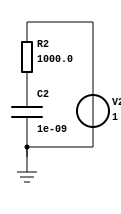

In [11]:
c = Circuit()
ac = Voltage(c, voltage=1, ac=True)
r1 = Resistor(c, resistance=1e3)
c1 = Capacitor(c, capacitance=1e-9)

connect(ac.pos, r1)
out = connect(c1, r1)
ground(ac.neg, c1)

SVG(c.render_svg())

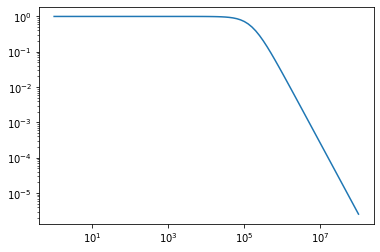

In [12]:
c.compute_ac_sweep(1, 1e8, 10)
plt.xscale('log')
plt.yscale('log')
plt.plot(c.frequency, out.voltage.real)

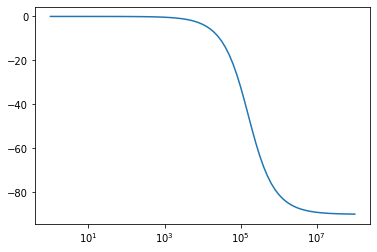

In [19]:
plt.xscale('log')
plt.plot(c.frequency, 90 * np.angle(out.voltage) / (np.pi/2.0))

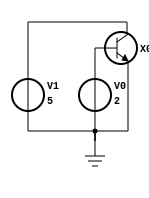

In [2]:
c = Circuit()

RFTransistor = import_subcircuit(c, 'BFR181_spice_v2.txt', 'BFR181', 'collector', 'base', 'emitter', symbol='npn')

dcB = Voltage(c, voltage=2)
dcC = Voltage(c, voltage=5)
t = RFTransistor(c)

connect(dcB.pos, t.base)
connect(dcC.pos, t.collector)
ground(dcB.neg, dcC.neg, t.emitter)

SVG(c.render_svg())

Ignoring node x0.2
Ignoring node x0.3
Ignoring node x0.1
Ignoring node x0.30
Ignoring node x0.20
Ignoring node x0.2
Ignoring node x0.3
Ignoring node x0.1
Ignoring node x0.30
Ignoring node x0.20
Ignoring node x0.2
Ignoring node x0.3
Ignoring node x0.1
Ignoring node x0.30
Ignoring node x0.20


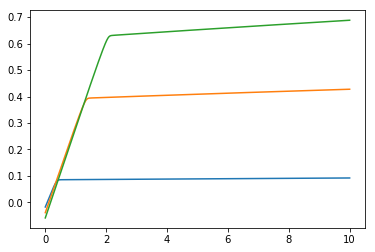

In [15]:
dcB.voltage = 1
c.compute_dc_sweep((dcC, 0, 10, 0.01))
plt.plot(c.sweep, -dcC.current)

dcB.voltage = 1.5
c.compute_dc_sweep((dcC, 0, 10, 0.01))
plt.plot(c.sweep, -dcC.current)

dcB.voltage = 2
c.compute_dc_sweep((dcC, 0, 10, 0.01))
plt.plot(c.sweep, -dcC.current)

Ignoring node x0.2
Ignoring node x0.3
Ignoring node x0.1
Ignoring node x0.30
Ignoring node x0.20


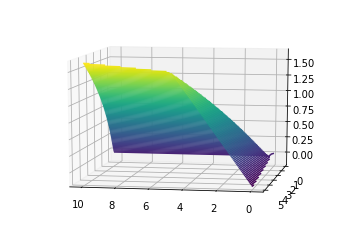

In [16]:
from mpl_toolkits import mplot3d

import numpy as np

c.compute_dc_sweep((dcC, 0, 10, 0.2), (dcB, 0, 5, 0.1))
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(np.arange(0,10.1,0.2), np.arange(0,5.1, 0.1), np.array(-dcC.current).reshape(51,51), 100, cmap='viridis')

ax.view_init(10, 100)

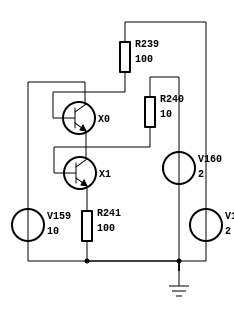

In [160]:
c = Circuit()

RFTransistor = import_subcircuit(c, 'BFR181_spice_v2.txt', 'BFR181', 'collector', 'base', 'emitter', symbol='npn')

dc = Voltage(c, voltage=10)

t_lo = RFTransistor(c)
t_rf = RFTransistor(c)

rf_signal = Voltage(c, voltage=2, sin=True, amplitude=0.05, offset=2, freq=1e8)
lo_signal = Voltage(c, voltage=2, sin=True, amplitude=0.05, offset=2, freq=1e9)

r_lo = Resistor(c, resistance=100)
r_rf = Resistor(c, resistance=10)
r_gnd = Resistor(c, resistance=100)

connect(dc.pos, t_lo.collector)

connect(lo_signal.pos, r_lo)
connect(r_lo, t_lo.base)

connect(t_lo.emitter, t_rf.collector)

connect(rf_signal.pos, r_rf)
connect(r_rf, t_rf.base)

out = connect(t_rf.emitter, r_gnd)
ground(r_gnd, lo_signal.neg, rf_signal.neg, dc.neg)

SVG(c.render_svg())

Ignoring node x0.2
Ignoring node x0.3
Ignoring node x0.1
Ignoring node x0.30
Ignoring node x0.20
Ignoring node x0.31
Ignoring node x0.32
Ignoring node x1.2
Ignoring node x1.3
Ignoring node x1.1
Ignoring node x1.30
Ignoring node x1.20
Ignoring node x1.31
Ignoring node x1.32


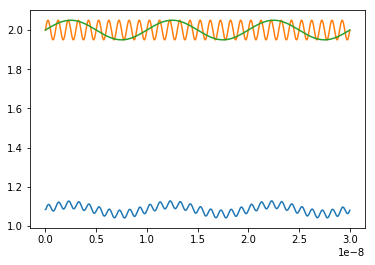

In [161]:
c.compute_transient(30e-9, 1e-11)
plt.plot(c.time, out.voltage)
plt.plot(c.time, lo_signal.pos.voltage)
plt.plot(c.time, rf_signal.pos.voltage)

Ignoring node x0.2
Ignoring node x0.3
Ignoring node x0.1
Ignoring node x0.30
Ignoring node x0.20
Ignoring node x1.2
Ignoring node x1.3
Ignoring node x1.1
Ignoring node x1.30
Ignoring node x1.20


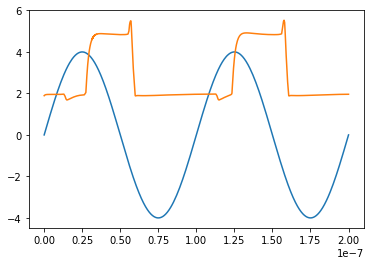

In [54]:
c.compute_transient(2e-7, 1e-9)
plt.plot(c.time, in_signal.pos.voltage)
plt.plot(c.time, out.voltage)

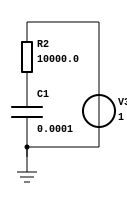

In [8]:
c = Circuit()
dc = Voltage(c, piecewise=[0,   0, 
                           0.1, 5.0,
                           2.0, 0])
c1 = Capacitor(c, capacitance=100e-6)
r1 = Resistor(c, resistance=10e3)

connect(dc.pos, r1)
filt = connect(r1, c1)
ground(dc.neg, c1)

SVG(c.render_svg())

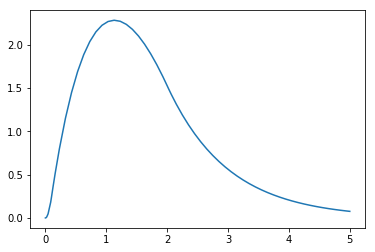

In [9]:
c.compute_transient(5,0.1)
plt.plot(c.time, filt.voltage)

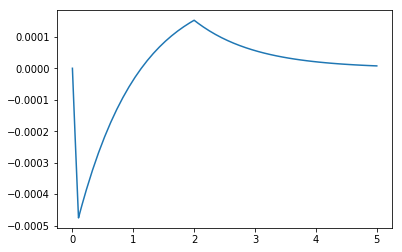

In [10]:
plt.plot(c.time, dc.current) 

In [6]:
c = Circuit()
dc = Voltage(c, voltage=2)
r1 = Resistor(c, resistance=100)
r2 = Resistor(c, resistance=200)
r3 = Resistor(c, resistance=200)

ground(dc.neg, r2, r3)
connect(dc.pos, r1)
div = connect(r1, r2, r3)

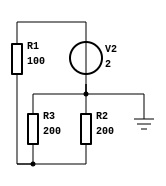

In [7]:
SVG(c.render_svg())

In [8]:
c.compute_operating_point()
print(div.voltage)

1.0


In [9]:
c.compute_dc_sweep((dc, 0, 1, 0.5))
print(div.voltage)

Ignoring node v-sweep [0.  0.5 1. ]
[0.   0.25 0.5 ]
